## <p style="background-color:yellow;color:black;font-size:120%;text-align:center;border-radius:10px 10px;font-weight:bold;border:0px solid #800080;">Exploratory Data Analysis (EDA) Using Python</p>

In [2]:
import pandas as pd

In [2]:
file_path = r'C:\Users\ARPAN PANIGRAHI\Downloads\DATA ANALYST-DOCS\a2.Data Model-1.xlsx'

Sales_tbl = pd.read_excel(file_path, sheet_name = 'Sales_tbl')
GEO_MAP = pd.read_excel(file_path, sheet_name = 'GEO_MAP')
CUSTOMER = pd.read_excel(file_path, sheet_name = 'CUSTOMER')
PRODUCT = pd.read_excel(file_path, sheet_name = 'PRODUCT')
Master_Calendar = pd.read_excel(file_path, sheet_name = 'Master_Calendar')

# print(Sales_tbl)
# print(GEO_MAP)
# print(CUSTOMER)
# print(PRODUCT)
# print(Master_Calendar)

In [4]:
Sales_tbl.head(3)

,Row ID,Order ID,City,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Discount Amount,Sales After Discount,Profit,Shipping Cost,Order Priority
0,32298,US -2012-124891,New York City,2012-07-31,2012-07-31,Same Day,RH-19495,TEC-AC-10003033,2309.650,7,0.0,0.0000,2309.6500,762.1845,933.57,Critical
1,26341,AU -2013-77878,Wollongong,2013-02-05,2013-02-07,Second Class,JR-16210,FUR-CH-10003950,3709.395,9,0.1,370.9395,3338.4555,-288.7650,923.63,Critical
2,25330,AU -2013-71249,Brisbane,2013-10-17,2013-10-18,First Class,CR-12730,TEC-PH-10004664,5175.171,9,0.1,517.5171,4657.6539,919.9710,915.49,Medium


In [5]:
PRODUCT.columns

Index(['Product_ID', 'Category', 'Sub-Category', 'Product_Name'], dtype='object')

In [7]:
GEO_MAP.columns


Index(['City', 'Country', 'Country_Code', 'State', 'Market', 'Region'], dtype='object')

# JOINS

In [6]:
sales_geomap = pd.merge(left=Sales_tbl, right=GEO_MAP, how='left', on=['City'])
# sales_geomap.head()

In [7]:
sales_geomap_cust = pd.merge(left=sales_geomap, right=CUSTOMER, how='left', left_on=['Customer ID'], right_on=['Customer_ID'])
# sales_geomap_cust

In [8]:
sales_geomap_cust_prod=pd.merge(left=sales_geomap_cust, right=PRODUCT, how='left', left_on=['Product ID'], right_on=['Product_ID'])
# sales_geomap_cust_prod

In [9]:
sales_geomap_cust_prod_cal=pd.merge(left=sales_geomap_cust_prod, right=Master_Calendar, how='left', on=['Order Date'])
#sales_geomap_cust_prod_cal

In [10]:
sales_geomap_cust_prod_cal.head()

,Row ID,Order ID,City,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,...,Product_Name,Order Year,Order Month,Order day,CYTDFlag,LYTDFlag,Month,MonthYear,Week,Quarter
0,32298,US -2012-124891,New York City,2012-07-31,2012-07-31,Same Day,RH-19495,TEC-AC-10003033,2309.650,7,...,Plantronics CS510 - Over-the-Head monaural Wir...,2012,7,31,0,0,Jul,Jul-2012,31,Q3
1,26341,AU -2013-77878,Wollongong,2013-02-05,2013-02-07,Second Class,JR-16210,FUR-CH-10003950,3709.395,9,...,"Novimex Executive Leather Armchair, Black",2013,2,5,0,1,Feb,Feb-2013,6,Q1
2,25330,AU -2013-71249,Brisbane,2013-10-17,2013-10-18,First Class,CR-12730,TEC-PH-10004664,5175.171,9,...,"Nokia Smart Phone, with Caller ID",2013,10,17,0,1,Oct,Oct-2013,42,Q4
3,13524,DE -2013-1579342,Berlin,2013-01-28,2013-01-30,First Class,KM-16375,TEC-PH-10004583,2892.510,5,...,"Motorola Smart Phone, Cordless",2013,1,28,0,1,Jan,Jan-2013,5,Q1
4,47221,SN -2013-4320,Dakar,2013-11-05,2013-11-06,Same Day,RH-9495,TEC-SHA-10000501,2832.960,8,...,"Sharp Wireless Fax, High-Speed",2013,11,5,0,1,Nov,Nov-2013,45,Q4


In [11]:
sales_geomap_cust_prod_cal.tail()

,Row ID,Order ID,City,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,...,Product_Name,Order Year,Order Month,Order day,CYTDFlag,LYTDFlag,Month,MonthYear,Week,Quarter
51285,29002,JP -2014-62366,Kure,2014-06-19,2014-06-19,Same Day,KE-16420,OFF-FA-10000746,65.100,5,...,"Advantus Thumb Tacks, 12 Pack",2014,6,19,1,0,Jun,Jun-2014,25,Q2
51286,35398,US -2014-102288,Houston,2014-06-20,2014-06-24,Standard Class,ZC-21910,OFF-AP-10002906,0.444,1,...,Hoover Replacement Belt for Commercial Guardsm...,2014,6,20,1,0,Jun,Jun-2014,25,Q2
51287,40470,US -2013-155768,Oxnard,2013-12-02,2013-12-02,Same Day,LB-16795,OFF-EN-10001219,22.920,3,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",2013,12,2,0,1,Dec,Dec-2013,49,Q4
51288,9596,BR -2012-140767,Valinhos,2012-02-18,2012-02-22,Standard Class,RB-19795,OFF-BI-10000806,13.440,2,...,"Acco Index Tab, Economy",2012,2,18,0,0,Feb,Feb-2012,7,Q1
51289,6147,NI -2012-134460,Tipitapa,2012-05-22,2012-05-26,Second Class,MC-18100,OFF-PA-10004155,61.380,3,...,"Eaton Computer Printout Paper, 8.5 x 11",2012,5,22,0,0,May,May-2012,21,Q2


In [15]:
sales_geomap_cust_prod_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                51290 non-null  int64         
 1   Order ID              51290 non-null  object        
 2   City                  51290 non-null  object        
 3   Order Date            51290 non-null  datetime64[ns]
 4   Ship Date             51290 non-null  datetime64[ns]
 5   Ship Mode             51290 non-null  object        
 6   Customer ID           51290 non-null  object        
 7   Product ID            51290 non-null  object        
 8   Sales                 51290 non-null  float64       
 9   Quantity              51290 non-null  int64         
 10  Discount              51290 non-null  float64       
 11  Discount Amount       51290 non-null  float64       
 12  Sales After Discount  51290 non-null  float64       
 13  Profit          

In [16]:
sales_geomap_cust_prod_cal.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Discount Amount,Sales After Discount,Profit,Shipping Cost,Order Year,Order Month,Order day,CYTDFlag,LYTDFlag,Week
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,26.249796,220.240785,28.610982,26.375818,2012.777208,7.522636,15.782960,0.341802,0.269039,31.287112
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,0.000000,0.088800,-6599.978000,0.002000,2011.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,25.290000,0.000000,2.610000,2012.000000,5.000000,8.000000,0.000000,0.000000,20.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,0.000000,72.000000,9.240000,7.790000,2013.000000,8.000000,16.000000,0.000000,0.000000,33.000000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,15.504000,220.520100,36.810000,24.450000,2014.000000,10.000000,23.000000,1.000000,1.000000,44.000000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,11319.240000,17499.950000,8399.976000,933.570000,2014.000000,12.000000,31.000000,1.000000,1.000000,53.000000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,99.147027,447.018523,174.340972,57.296810,1.098931,3.300056,8.742164,0.474318,0.443464,14.429795


In [17]:
sales_geomap_cust_prod_cal.columns

Index(['Row ID', 'Order ID', 'City', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Discount Amount', 'Sales After Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Country', 'Country_Code', 'State', 'Market',
       'Region', 'Customer_ID', 'Customer_Name', 'Segment', 'Product_ID',
       'Category', 'Sub-Category', 'Product_Name', 'Order Year', 'Order Month',
       'Order day', 'CYTDFlag', 'LYTDFlag', 'Month', 'MonthYear', 'Week',
       'Quarter'],
      dtype='object')

In [18]:
sales_geomap_cust_prod_cal.isnull().sum()

Row ID                  0
Order ID                0
City                    0
Order Date              0
Ship Date               0
Ship Mode               0
Customer ID             0
Product ID              0
Sales                   0
Quantity                0
Discount                0
Discount Amount         0
Sales After Discount    0
Profit                  0
Shipping Cost           0
Order Priority          0
Country                 0
Country_Code            0
State                   0
Market                  0
Region                  0
Customer_ID             0
Customer_Name           0
Segment                 0
Product_ID              0
Category                0
Sub-Category            0
Product_Name            0
Order Year              0
Order Month             0
Order day               0
CYTDFlag                0
LYTDFlag                0
Month                   0
MonthYear               0
Week                    0
Quarter                 0
dtype: int64

In [19]:
sales_geomap_cust_prod_cal.shape


(51290, 37)

In [20]:
sales_geomap_cust_prod_cal.dtypes

Row ID                           int64
Order ID                        object
City                            object
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Ship Mode                       object
Customer ID                     object
Product ID                      object
Sales                          float64
Quantity                         int64
Discount                       float64
Discount Amount                float64
Sales After Discount           float64
Profit                         float64
Shipping Cost                  float64
Order Priority                  object
Country                         object
Country_Code                    object
State                           object
Market                          object
Region                          object
Customer_ID                     object
Customer_Name                   object
Segment                         object
Product_ID                      object
Category                 

In [21]:
sales_geomap_cust_prod_cal.columns

Index(['Row ID', 'Order ID', 'City', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Discount Amount', 'Sales After Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Country', 'Country_Code', 'State', 'Market',
       'Region', 'Customer_ID', 'Customer_Name', 'Segment', 'Product_ID',
       'Category', 'Sub-Category', 'Product_Name', 'Order Year', 'Order Month',
       'Order day', 'CYTDFlag', 'LYTDFlag', 'Month', 'MonthYear', 'Week',
       'Quarter'],
      dtype='object')

In [22]:
df = sales_geomap_cust_prod_cal[['Row ID', 'Quantity', 'Discount','Discount Amount', 'Sales After Discount', 'Profit', 'Shipping Cost', 'Order Year']]
df

# , 'Order Month',
#        'Order day', 'CYTDFlag', 'LYTDFlag', 'Week'

,Row ID,Quantity,Discount,Discount Amount,Sales After Discount,Profit,Shipping Cost,Order Year
0,32298,7,0.0,0.0000,2309.6500,762.1845,933.570,2012
1,26341,9,0.1,370.9395,3338.4555,-288.7650,923.630,2013
2,25330,9,0.1,517.5171,4657.6539,919.9710,915.490,2013
3,13524,5,0.1,289.2510,2603.2590,-96.5400,910.160,2013
4,47221,8,0.0,0.0000,2832.9600,311.5200,903.040,2013
...,...,...,...,...,...,...,...,...
51285,29002,5,0.0,0.0000,65.1000,4.5000,0.010,2014
51286,35398,1,0.8,0.3552,0.0888,-1.1100,0.010,2014
51287,40470,3,0.0,0.0000,22.9200,11.2308,0.010,2013
51288,9596,2,0.0,0.0000,13.4400,2.4000,0.003,2012


In [48]:
sales_geomap_cust_prod_cal.columns

Index(['Row ID', 'Order ID', 'City', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Discount Amount', 'Sales After Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Country', 'Country_Code', 'State', 'Market',
       'Region', 'Customer_ID', 'Customer_Name', 'Segment', 'Product_ID',
       'Category', 'Sub-Category', 'Product_Name', 'Order Year', 'Order Month',
       'Order day', 'CYTDFlag', 'LYTDFlag', 'Month', 'MonthYear', 'Week',
       'Quarter'],
      dtype='object')

# General Understanding:n?

In [23]:
# Q1. What is the size of the dataset? (number of rows and columns)
sales_geomap_cust_prod_cal.shape

(51290, 37)

In [25]:
# Q2. Are there any missing values in the dataset? If so, how are they distributed across columns?
sales_geomap_cust_prod_cal.isnull().sum()

Row ID                  0
Order ID                0
City                    0
Order Date              0
Ship Date               0
Ship Mode               0
Customer ID             0
Product ID              0
Sales                   0
Quantity                0
Discount                0
Discount Amount         0
Sales After Discount    0
Profit                  0
Shipping Cost           0
Order Priority          0
Country                 0
Country_Code            0
State                   0
Market                  0
Region                  0
Customer_ID             0
Customer_Name           0
Segment                 0
Product_ID              0
Category                0
Sub-Category            0
Product_Name            0
Order Year              0
Order Month             0
Order day               0
CYTDFlag                0
LYTDFlag                0
Month                   0
MonthYear               0
Week                    0
Quarter                 0
dtype: int64

In [26]:
# Q3. What are the data types of each column?
sales_geomap_cust_prod_cal.dtypes

Row ID                           int64
Order ID                        object
City                            object
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Ship Mode                       object
Customer ID                     object
Product ID                      object
Sales                          float64
Quantity                         int64
Discount                       float64
Discount Amount                float64
Sales After Discount           float64
Profit                         float64
Shipping Cost                  float64
Order Priority                  object
Country                         object
Country_Code                    object
State                           object
Market                          object
Region                          object
Customer_ID                     object
Customer_Name                   object
Segment                         object
Product_ID                      object
Category                 

# Uniqueness and Identifiers:

In [28]:
# Q4. Are there any duplicate rows in the dataset?
sales_geomap_cust_prod_cal.duplicated().sum()

0

In [30]:
# Q5. What are the unique values in categorical columns like 'City', 'Country', 'Product_Name', etc.?
sales_geomap_cust_prod_cal['Customer ID'].unique()

array(['RH-19495', 'JR-16210', 'CR-12730', ..., 'RC-9825', 'MG-7890',
       'ZC-11910'], dtype=object)

In [31]:
# Q6. Do any columns serve as identifiers, such as 'Row ID', 'Order ID', or 'Customer ID'? If so, are they unique?
sales_geomap_cust_prod_cal['Order ID'].nunique()

25092

# Sales and Profit Analysis:ers.

In [35]:
# Q7. For distribution, use describe() or visualization tools like histograms or boxplots.
sales_geomap_cust_prod_cal['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

In [36]:
sales_geomap_cust_prod_cal['Profit'].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

In [38]:
# Q8. Use groupby() to analyze sales and profit by different categories.
sales_by_category = sales_geomap_cust_prod_cal.groupby('Category')['Sales'].sum()
sales_by_category

Category
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Technology         4.744557e+06
Name: Sales, dtype: float64

# Customer Analysis:

In [56]:
# Q9. unique customers.
sales_geomap_cust_prod_cal['Customer ID'].nunique()

1590

In [55]:
# Q10. Purchasing behavior by segment
segment_purchases = sales_geomap_cust_prod_cal.groupby('Segment')['Sales'].sum()
segment_purchases

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64

# Product Analysis:

In [57]:
# Q11. Top-selling products and categories
top_products = sales_geomap_cust_prod_cal['Product_Name'].value_counts().head(10)
top_products

# ['Row ID', 'Order ID', 'City', 'Order Date', 'Ship Date', 'Ship Mode',
#        'Customer ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
#        'Discount Amount', 'Sales After Discount', 'Profit', 'Shipping Cost',
#        'Order Priority', 'Country', 'Country_Code', 'State', 'Market',
#        'Region', 'Customer_ID', 'Customer_Name', 'Segment', 'Product_ID',
#        'Category', 'Sub-Category', 'Product_Name', 'Order Year', 'Order Month',
#        'Order day', 'CYTDFlag', 'LYTDFlag', 'Month', 'MonthYear', 'Week',
#        'Quarter'],

Product_Name
Staples                                  230
Ibico Index Tab, Clear                   108
Smead File Cart, Single Width             77
Avery Index Tab, Clear                    76
Acco Index Tab, Clear                     75
Tenex File Cart, Single Width             75
Eldon File Cart, Single Width             73
Stanley Pencil Sharpener, Water Color     72
Cardinal Index Tab, Clear                 71
Sanford Pencil Sharpener, Water Color     66
Name: count, dtype: int64

In [52]:
top_products = sales_geomap_cust_prod_cal['Product_Name'].value_counts().head()
top_products

Product_Name
Staples                          230
Ibico Index Tab, Clear           108
Smead File Cart, Single Width     77
Avery Index Tab, Clear            76
Acco Index Tab, Clear             75
Name: count, dtype: int64

In [53]:
# Sales by product categories
sales_by_category = sales_geomap_cust_prod_cal.groupby('Category')['Sales'].sum()
sales_by_category

Category
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Technology         4.744557e+06
Name: Sales, dtype: float64

# Geographical Analysis:

In [60]:
# Q12. Sales distribution by country
sales_by_country = sales_geomap_cust_prod_cal.groupby('Country')['Sales'].sum()
sales_by_country

Country
Afghanistan    21673.32000
Albania         3888.12000
Algeria        36091.59000
Angola         25554.00000
Argentina      54703.20008
                  ...     
Venezuela      71062.77636
Vietnam        65800.19940
Yemen           2465.71200
Zambia         26035.50000
Zimbabwe        3765.10500
Name: Sales, Length: 147, dtype: float64

# Order and Shipping Analysis

In [64]:
# Q13. Common shipping modes and order priorities
shipping_modes = sales_geomap_cust_prod_cal['Ship Mode'].value_counts()
shipping_modes

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [65]:
order_priorities = sales_geomap_cust_prod_cal['Order Priority'].value_counts()
order_priorities

Order Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

# Discount Analysis

In [68]:
# Q14. Discount distribution
sales_geomap_cust_prod_cal['Discount'].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

In [72]:
# Q15. Relationship between discount and sales/profit
sales_geomap_cust_prod_cal['Discount'].corr(sales_geomap_cust_prod_cal['Sales'])

-0.08672186697182652

In [73]:
sales_geomap_cust_prod_cal['Discount'].corr(sales_geomap_cust_prod_cal['Profit'])

-0.31649017182727185

In [76]:
# Calculate the count of each country
country_counts = sales_geomap_cust_prod_cal['Country'].value_counts()
country_counts

Country
United States    10448
France            2825
Australia         2462
Mexico            2440
Germany           2065
                 ...  
Chad                 2
Burundi              2
Bahrain              2
Eritrea              2
South Sudan          2
Name: count, Length: 147, dtype: int64

# Correlation 

In [77]:
df = sales_geomap_cust_prod_cal[['Row ID', 'Quantity', 'Discount','Discount Amount', 'Sales After Discount', 'Profit', 'Shipping Cost', 'Order Year']]
df

,Row ID,Quantity,Discount,Discount Amount,Sales After Discount,Profit,Shipping Cost,Order Year
0,32298,7,0.0,0.0000,2309.6500,762.1845,933.570,2012
1,26341,9,0.1,370.9395,3338.4555,-288.7650,923.630,2013
2,25330,9,0.1,517.5171,4657.6539,919.9710,915.490,2013
3,13524,5,0.1,289.2510,2603.2590,-96.5400,910.160,2013
4,47221,8,0.0,0.0000,2832.9600,311.5200,903.040,2013
...,...,...,...,...,...,...,...,...
51285,29002,5,0.0,0.0000,65.1000,4.5000,0.010,2014
51286,35398,1,0.8,0.3552,0.0888,-1.1100,0.010,2014
51287,40470,3,0.0,0.0000,22.9200,11.2308,0.010,2013
51288,9596,2,0.0,0.0000,13.4400,2.4000,0.003,2012


In [78]:
df.corr()

,Row ID,Quantity,Discount,Discount Amount,Sales After Discount,Profit,Shipping Cost,Order Year
Row ID,1.000000,-0.173483,0.087594,-0.020742,-0.043269,-0.019037,-0.039076,-0.000921
Quantity,-0.173483,1.000000,-0.019875,0.166932,0.304995,0.104365,0.272649,-0.005049
Discount,0.087594,-0.019875,1.000000,0.270822,-0.154655,-0.316490,-0.079055,-0.005894
Discount Amount,-0.020742,0.166932,0.270822,1.000000,0.316606,-0.316809,0.329360,-0.008131
Sales After Discount,-0.043269,0.304995,-0.154655,0.316606,1.000000,0.599170,0.764690,-0.001365
Profit,-0.019037,0.104365,-0.316490,-0.316809,0.599170,1.000000,0.354441,0.002626
Shipping Cost,-0.039076,0.272649,-0.079055,0.329360,0.764690,0.354441,1.000000,-0.003137
Order Year,-0.000921,-0.005049,-0.005894,-0.008131,-0.001365,0.002626,-0.003137,1.000000


<Axes: >

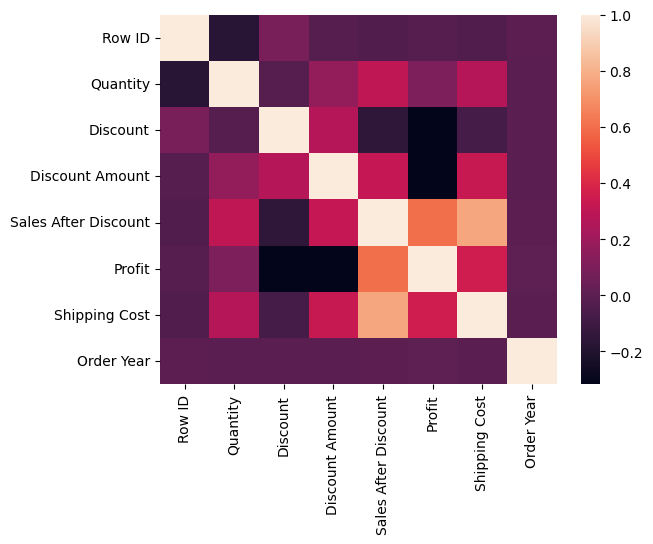

In [79]:
import seaborn as sns
sns.heatmap(df.corr())

# DAY-2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
import pandas as pd


# 1. Total sales for each city
total_sales_by_city = sales_geomap_cust_prod_cal.groupby('City')['Sales'].sum()
total_sales_by_city

City
Aachen                   3803.151
Aalen                     979.695
Aalst                     387.330
Aba                      1064.124
Abadan                   1354.950
                           ...   
Zwedru                     49.410
Zwickau                    99.030
Zwolle                    150.585
eMbalenhle                 75.900
Águas Lindas de Goiás     186.960
Name: Sales, Length: 3636, dtype: float64

In [15]:
# 3. Average profit margin for each product category
average_profit_margin_by_category = sales_geomap_cust_prod_cal.groupby('Category')['Profit'].mean()
average_profit_margin_by_category

Category
Furniture          28.878567
Office Supplies    16.578961
Technology         65.454958
Name: Profit, dtype: float64

In [16]:
# 4. Variation of quantity of products sold by order priority
variation_of_quantity_by_order_priority = sales_geomap_cust_prod_cal.groupby('Order Priority')['Quantity'].std()
variation_of_quantity_by_order_priority

Order Priority
Critical    2.271256
High        2.286338
Low         2.214049
Medium      2.280966
Name: Quantity, dtype: float64

In [17]:
# 5. Trend of sales over the years by market
sales_trend_over_years_by_market = sales_geomap_cust_prod_cal.groupby(['Market', 'Order Year'])['Sales'].sum()
sales_trend_over_years_by_market

Market  Order Year
APAC    2011          6.301148e+05
        2012          7.315285e+05
        2013          9.386540e+05
        2014          1.167422e+06
Africa  2011          1.358547e+05
        2012          1.607370e+05
        2013          2.429667e+05
        2014          2.902649e+05
Canada  2011          3.183579e+04
        2012          4.561078e+04
        2013          4.328315e+04
        2014          6.543068e+04
EMEA    2011          1.535443e+05
        2012          1.757342e+05
        2013          2.229053e+05
        2014          3.120951e+05
EU      2011          4.260668e+05
        2012          6.156559e+05
        2013          6.883614e+05
        2014          9.788416e+05
LATAM   2011          3.972281e+05
        2012          4.509707e+05
        2013          6.060995e+05
        2014          7.108731e+05
US      2011          4.848065e+05
        2012          4.972017e+05
        2013          6.634764e+05
        2014          7.749389e+05
N

In [18]:
# 7. Distribution of shipping costs by product category
shipping_cost_distribution_by_category = sales_geomap_cust_prod_cal.groupby('Category')['Shipping Cost'].describe()
shipping_cost_distribution_by_category

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,9876.0,44.584799,72.560193,0.040,7.35,20.2255,50.87,923.63
Office Supplies,31273.0,12.964805,35.091165,0.002,1.69,4.2500,10.87,867.69
Technology,10141.0,49.999791,79.022261,0.040,9.56,23.4000,55.34,933.57


In [19]:
# 9. Seasonal patterns in sales (highest sales months)
seasonal_sales_pattern = sales_geomap_cust_prod_cal.groupby('Order Month')['Sales'].sum().sort_values(ascending=False).head()
seasonal_sales_pattern

Order Month
12    1.580781e+06
11    1.551277e+06
9     1.437380e+06
8     1.293833e+06
6     1.269717e+06
Name: Sales, dtype: float64

In [20]:
# 10. Correlation between discount amount and sales after discount
correlation_discount_sales = sales_geomap_cust_prod_cal[['Discount Amount', 'Sales After Discount']].corr().iloc[0,1]
correlation_discount_sales

0.3166057612013337